<a href="https://colab.research.google.com/github/arshya-garg/ISTE-Web-Dev-SMP/blob/main/Copy_of_Week1_day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h1> Data Preprocessing</h1> </b>





Machine Learning performance depends  on data that it is feeded <br> often called GIGO(Garbage In Garbage Out)



Data :-   A  useful piece of information. Data can be in the form of pictures ,audio ,text,tables, etc.
<br>  

**Data Loading**

CSV format (short for comma-separated values) are most commonly used for Machine learning ,so we will see how to load a data set (i.e. file ) in google colab notebook  :p
<br>



In [ ]:
#first method is using Github link  here u dont have to  download the actual dataset in local machine  
#first search for google colab and then login with your google account into that,now tap +code and 
#for reading csv file panda is used 
import pandas as pd 
#url = 'Guthub_copied_rawlink' ,u can find these links from google so dw XD
url='https://raw.githubusercontent.com/hxchua/datadoubleconfirm/master/datasets/arrivals2018.csv'

df =pd.read_csv(url)

In [ ]:
df.head()# to get first 5 rows of each column

,rank,city,country,arrivals_2017,arrivals_2018
0,1,Hong Kong,Hong Kong,27880300,29827200
1,2,Bangkok,Thailand,22453900,23688800
2,3,London,England,19827800,20715900
3,4,Singapore,Singapore,17618800,18551200
4,5,Macau,Macau,17337200,18931400


In [ ]:
# Second Method by downloading dataset and then uploaidng via colab
# Run the below code ,It will prompt you to select a file. 
#Click on “Choose Files” then select and upload the file. 
#Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it
from google.colab import files
uploaded = files.upload()




Saving heart2.csv to heart2.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['heart2.csv']))
# Dataset is now stored in a Pandas Dataframe


In [ ]:
df2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Unnamed: 14
0,NaN,1.0,3.0,145.0,233.0,1,0.0,150.0,0,2.3,0.0,0,1,1,NaN
1,37.0,1.0,2.0,130.0,250.0,0,1.0,187.0,0,3.5,0.0,0,2,1,NaN
2,41.0,0.0,1.0,130.0,204.0,0,0.0,172.0,0,1.4,2.0,0,2,1,NaN
3,56.0,1.0,1.0,120.0,236.0,0,1.0,178.0,0,0.8,2.0,0,2,1,NaN
4,57.0,0.0,0.0,120.0,354.0,0,1.0,163.0,1,0.6,2.0,0,2,1,NaN


In [ ]:
#third method ,this one asks for an authrntication code that you will get by clicking on url that will appear below 
#then You can use datset that wa saved iin your colab
from google.colab import drive
drive.mount('/content/drive')


KeyboardInterrupt: ignored

In [ ]:
#path = "copied path"   
# path name is like "/gdrive/My Drive/filename"
#to get the path of file click on your file in colab there will be an option copy path so copy paste the path
#df_3 = pd.read_csv(path) use this to acces the datset 
path="/content/heart.csv"
df3= pd.read_csv(path)

**Finding which feature is relavant to your model** 

In [ ]:
#columns of  a datset is usually called feature 
df2.head()
#here age	,sex,	cp	,trtbps,	chol	,fbs,	restecg	,thalachh	,exng,	oldpeak,	slp,	caa,	thall are features if we are predciting heart attack

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Unnamed: 14
0,NaN,1.0,3.0,145.0,233.0,1,0.0,150.0,0,2.3,0.0,0,1,1,NaN
1,37.0,1.0,2.0,130.0,250.0,0,1.0,187.0,0,3.5,0.0,0,2,1,NaN
2,41.0,0.0,1.0,130.0,204.0,0,0.0,172.0,0,1.4,2.0,0,2,1,NaN
3,56.0,1.0,1.0,120.0,236.0,0,1.0,178.0,0,0.8,2.0,0,2,1,NaN
4,57.0,0.0,0.0,120.0,354.0,0,1.0,163.0,1,0.6,2.0,0,2,1,NaN


In [ ]:
#so here output is 1->patient can get heart attack 0-> didnt get heart attack
#so may be some features are relavant in determining  the output where as some features are not
#consider if we had "Name "as one of the features ,will if affct the heart attack NO right
#so there is some function which can tell if the features are a function of each other 
# using output as one of the features can tell if  the another feature is relavant or not

#lets choose cholestrol as one of the column name
column_1=df2["chol"]
#choose output as the other column
column_2=df2["output"]
correlation = column_2. corr(column_1) #calculate correlation between `column_1` and `column_2`
print(correlation)
#the absolute value of correlation closer to 1 means they are dependent while closer to 0 means they dont have any relationship/dependency

-0.08491063831529512


In [ ]:
#chi square is also a measure of correlation  

CrosstabResult=pd.crosstab(index=df2['chol'],columns=df2['output'])
print(CrosstabResult)



# importing the required function
from scipy.stats import chi2_contingency

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

output  0  1
chol        
126.0   0  1
131.0   1  0
141.0   0  1
149.0   1  1
157.0   0  1
...    .. ..
394.0   0  1
407.0   1  0
409.0   1  0
417.0   0  1
564.0   0  1

[152 rows x 2 columns]
The P-Value of the ChiSq Test is: 0.11026857613493556


<b><h1> </h1></b>

---



In [ ]:
#The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data
#The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.

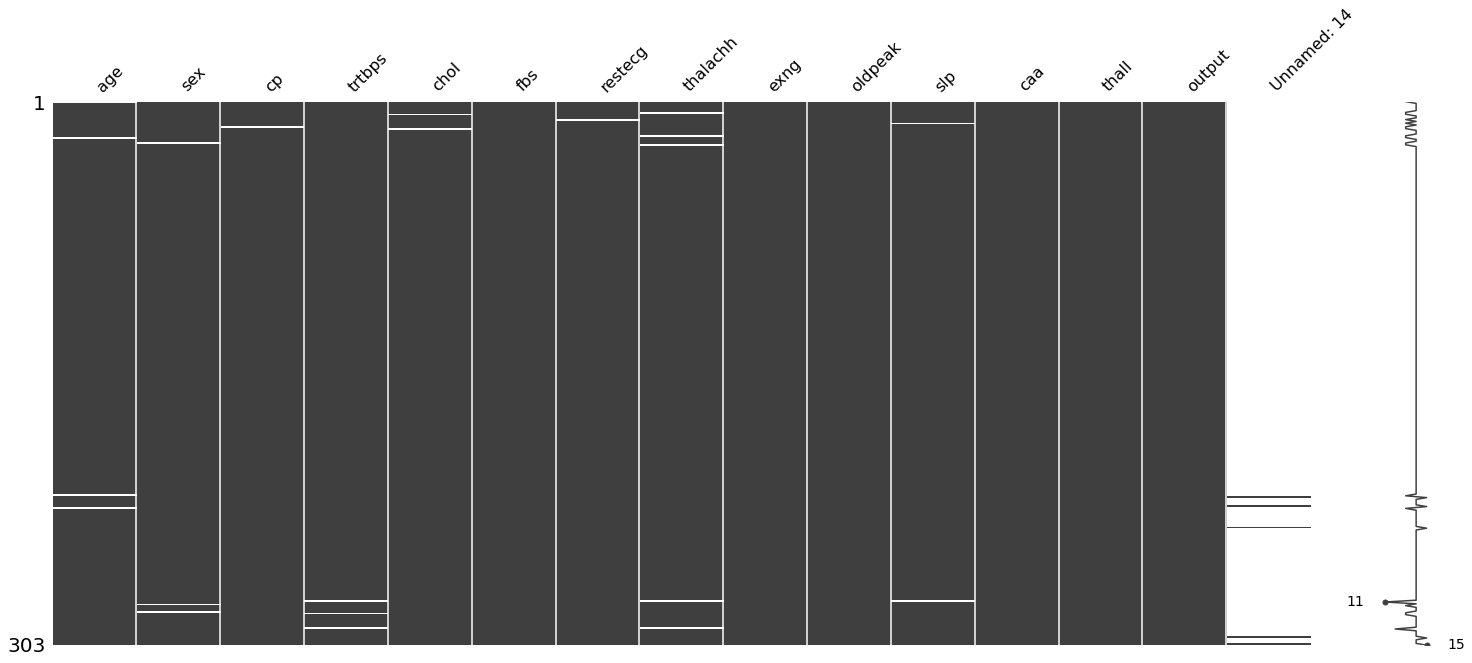

In [ ]:
#missingno is library to visulaise missing values 
#matrix helps in visualising missing values 
#each white line in each column means the value is missing i.e. NaN
#Unnamed column 14 is almost white that its almost 99% missing vaalue
import missingno as msno
msno.matrix(df2)


In [ ]:
#Missing values can be handled by deleting the rows or columns having null values. 
#If columns have more than half of rows as null then the entire column can be dropped. 
#The rows which are having one or more columns values as null can also be dropped.
#Pros:
#A model trained with the removal of all missing values creates a robust model.
#Cons:
#Loss of a lot of information.
#Works poorly if the percentage of missing values is excessive in comparison to the complete dataset.
#we can drop column using DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
df2.drop(axis=1,columns='Unnamed: 14',inplace=True)
df2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,NaN,1.0,3.0,145.0,233.0,1,0.0,150.0,0,2.3,0.0,0,1,1
1,37.0,1.0,2.0,130.0,250.0,0,1.0,187.0,0,3.5,0.0,0,2,1
2,41.0,0.0,1.0,130.0,204.0,0,0.0,172.0,0,1.4,2.0,0,2,1
3,56.0,1.0,1.0,120.0,236.0,0,1.0,178.0,0,0.8,2.0,0,2,1
4,57.0,0.0,0.0,120.0,354.0,0,1.0,163.0,1,0.6,2.0,0,2,1


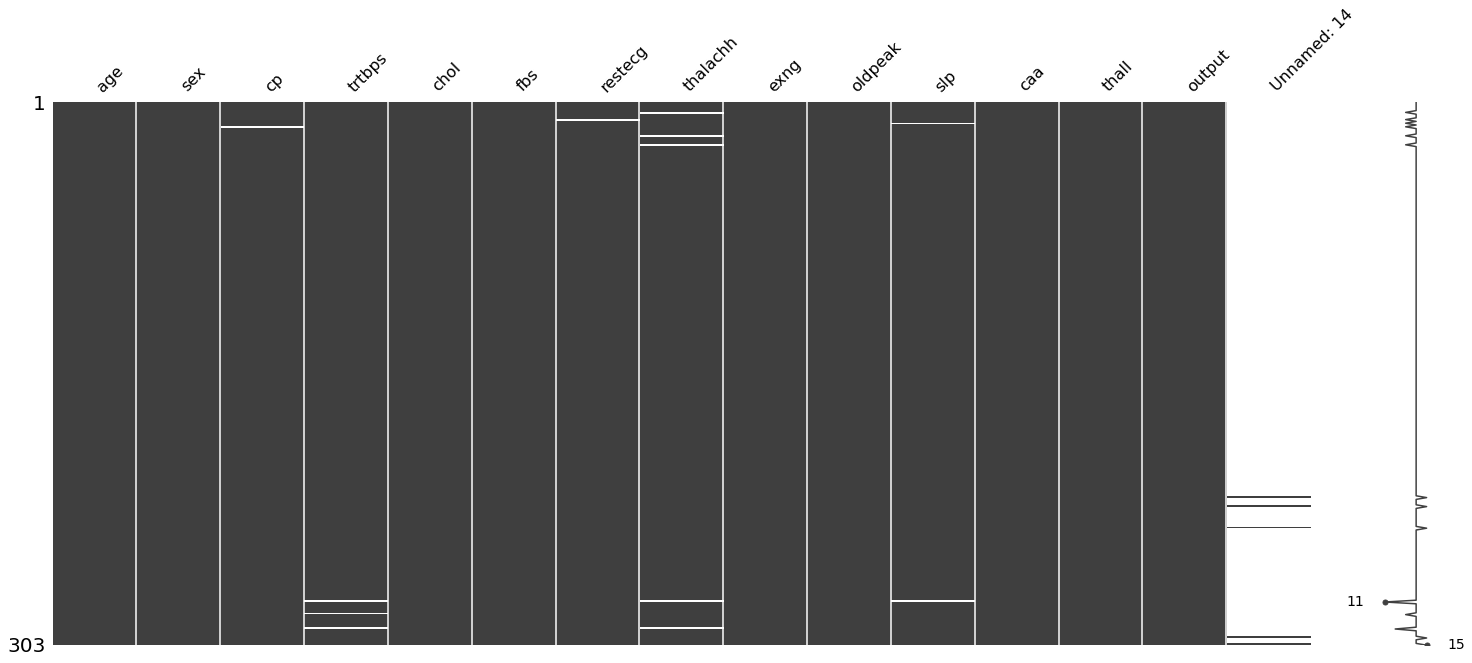

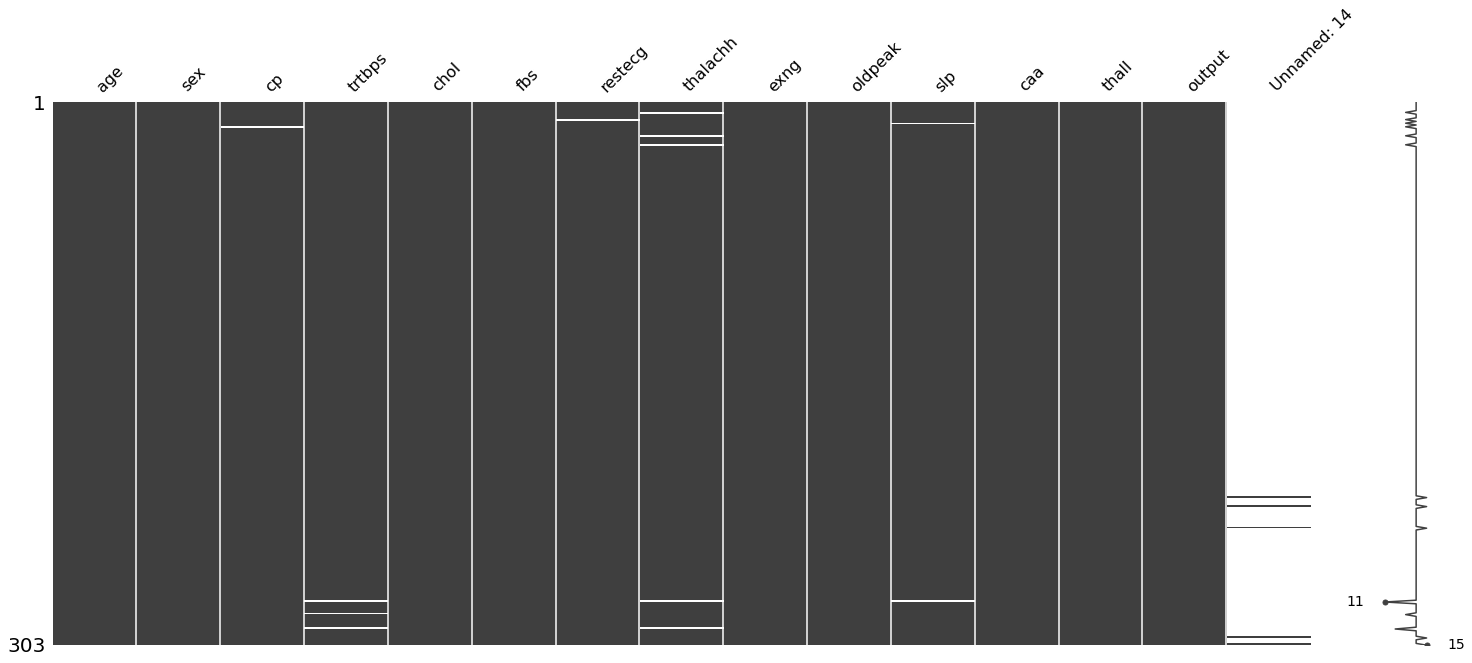

In [ ]:
#Columns in the dataset which are having numeric continuous values can be replaced with the mean, median, or mode of remaining values in the column. 
#Pros:
#Prevent data loss which results in deletion of rows or columns
#Works well with a small dataset and easy to implement.
#Cons:
#Works only with numerical continuous variables.
#Can cause data leakage
#Does not factor the covariance between features.

#here missing age values can be replaced with any mean,mode or median whatever suits, that you have to logically find  according to your model
import numpy as np
df2["age"] = df2["age"].replace(np.NaN, df2["age"].mean())
msno.matrix(df2)
#similarly missing  sex  can be replaced with most frequent  value because its mean or median doesnt make any sense 
#say you have 0 ->male and 1->female 
#some value other than 1/0 wont make any sense so mode is used for this  ,thats generally done for categorical values
df2['sex'].fillna(df2['sex'].mode()[0], inplace=True)
msno.matrix(df2)

For the time-series dataset variable, it makes sense to use the interpolation of the variable before and after a timestamp for a missing value

data["Age"] = data["Age"].interpolate(method='linear', limit_direction='forward', axis=0)



<b><h1>Categorical Encoding</h1> </b>


 Cetegorical values are the class value (non-numeric)<br>
 For example<br>
<i>The city where a person lives: Delhi, Mumbai, Ahmedabad, Bangalore, etc.<br>
The department a person works in: Finance, Human resources, IT, Production.<br>
The highest degree a person has: High school, Diploma, Bachelors, Masters, PhD.<br>
The grades of a student:  A+, A, B+, B, B- etc.<br>
*italicised text*sex :male ,female </i>
<br>
<h4> But  machine learning are mathematical models/algorithms so they need to be mapped to numeirc value  which can be done on several ways </h4>



<b> Nominal Categorical data </b><br>
Data which are just named but they don't have relative order 
<br> like sex male=0 or 1 and female =1 or 0 <br> 
 

 <b> Ordinal Categorical Data</b><br>
 Data which should  have a relative order on numerical encoding 
 <br> e.g.
  how much do you like maths
  <br>
  excellent ,very good ,good ,bad  <br>
  it should be mapped in relative numerical value


<b>Label encoding</b>


In [ ]:
#This is mapping for ordinal data ,i.e. preserves the precedence or relative sequnce 
degree=['High school','Masters','Diploma','Bachelors','Bachelors','Masters','Phd','High school','High school']#craeted a dummy data for refrence 
df4=pd.DataFrame(degree,columns=["Degree"])
print(df4)

        Degree
0  High school
1      Masters
2      Diploma
3    Bachelors
4    Bachelors
5      Masters
6          Phd
7  High school
8  High school


In [ ]:
pip install category_encoders


     |████████████████████████████████| 81kB 2.7MB/s 


In [ ]:
#Now 
import category_encoders as ce


# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Degree'],return_df=True,
                           mapping=[{'col':'Degree',
'mapping':{'None':0,'High school':1,'Diploma':2,'Bachelors':3,'Masters':4,'Phd':5}}])


#fit and transform train data 
df4_transformed = encoder.fit_transform(df4)
print(df4_transformed)


   Degree
0       1
1       4
2       2
3       3
4       3
5       4
6       5
7       1
8       1


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


<b>One Hot Encoding </b>

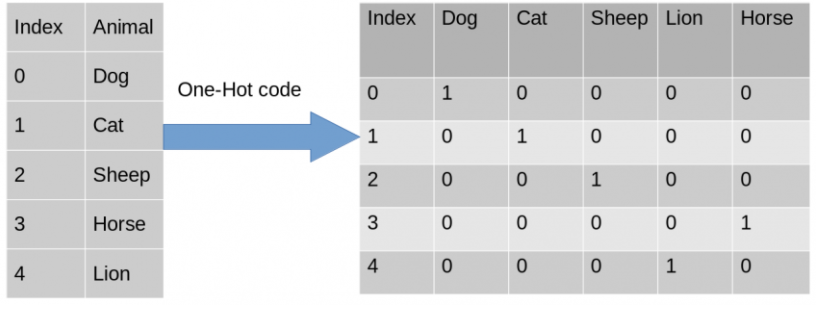

In [ ]:
#This is used for nominal categorical data i.e. no relative order or sequence
#created dummy dataset
l5=['Dog','Cat','Sheep','Horse','Lion','Dog'] 
df5=pd.DataFrame(l5,columns=['Animals'])
print(df5)


  Animals
0     Dog
1     Cat
2   Sheep
3   Horse
4    Lion
5     Dog


In [ ]:
import category_encoders as ce
#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols='Animals',handle_unknown='return_nan',return_df=True,use_cat_names=True)

df5_encoded = encoder.fit_transform(df5)
print(df5_encoded)
#here dog = 10000
#cat=01000
#sheep =00100
#Horse =00010
#Lion= 00001


   Animals_Dog  Animals_Cat  Animals_Sheep  Animals_Horse  Animals_Lion
0          1.0          0.0            0.0            0.0           0.0
1          0.0          1.0            0.0            0.0           0.0
2          0.0          0.0            1.0            0.0           0.0
3          0.0          0.0            0.0            1.0           0.0
4          0.0          0.0            0.0            0.0           1.0
5          1.0          0.0            0.0            0.0           0.0


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


<b>Dummy Encoding </b>


In [ ]:
#similar to one hot encoding it just uses n-1  binary  for n features  
df5_en=pd.get_dummies(data=df5,drop_first=True)
print(df5_en)
#cat was assigned 00000 otherwise same with a less bit  hence not represented in encoding 
#its just a small  improvemen on one_hot encoding
#Cat=0000
#Dog =1000
#Horse=0100
#Lion=0010
#Sheep =0001

   Animals_Dog  Animals_Horse  Animals_Lion  Animals_Sheep
0            1              0             0              0
1            0              0             0              0
2            0              0             0              1
3            0              1             0              0
4            0              0             1              0
5            1              0             0              0


<b>Base N encoder </b><br>
As u could see one hot encoding and dummy encoding were encouraging sparsity(less dense) thus are not memory efficient .
<br>So BaseN encoder is really helpful here to save memory and do the same job

In [ ]:
encoder= ce.BaseNEncoder(cols=['Animals'],return_df=True,base=3)
df5_N=encoder.fit_transform(df5)
print(df5_N)

   Animals_0  Animals_1  Animals_2
0          0          0          1
1          0          0          2
2          0          1          0
3          0          1          1
4          0          1          2
5          0          0          1


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


<b>Target Encoding </b>

In [ ]:
#Bayesian/Target encoders use information from dependent/target variables to encode the categorical data.
df6=pd.DataFrame({'class':['A,','B','C','B','C','A','A','A'],'Marks':[50,30,70,80,45,97,80,68]})

print(df6)


  class  Marks
0    A,     50
1     B     30
2     C     70
3     B     80
4     C     45
5     A     97
6     A     80
7     A     68


In [ ]:
encoder=ce.TargetEncoder(cols='class') 
encoder.fit_transform(df6['class'],df6['Marks'])


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,class
0,65.000000
1,57.689414
2,59.517061
3,57.689414
4,59.517061
5,79.679951
6,79.679951
7,79.679951


<b> <h1>Feature Scaling </h1></b>

In [ ]:
#Let me create a dummy data for understanding 
import pandas as pd
age =['22','23','25','27','45','34']
salary=['10000','23000','34500','34000','24000','34000']
df8=pd.DataFrame.from_dict({'Age' : age, 'Salary' : salary}, orient='index').T
print(df8)

  Age Salary
0  22  10000
1  23  23000
2  25  34500
3  27  34000
4  45  24000
5  34  34000


In [ ]:
#Feature Scaling is required for correct prediction and results.
# In case when the values of one of the column is very high as compare to others, 
#the impact of the column with higher value will be much higher as compared to the impact of other low valued columns.
# The feature with high magnitude will weigh lot more than features having low magnitude even if they are more crucial in determining the output.
# Hence the prediction might not give the expected results and may fail to satisfy the business use case.


Normalization is the concept of scaling the range of values in a feature between 0 to 1. This is referred as Min-Max Scaling.
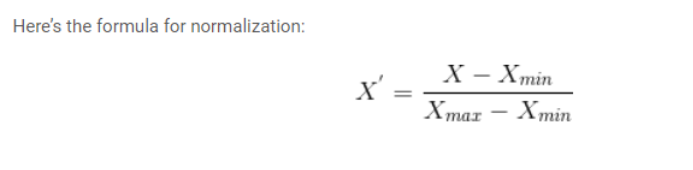

In [ ]:
import pandas as pd
import numpy as np


X = df8.iloc[:, :].values

from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X[:, 1:3] = norm.fit_transform(X[:, 1:3])
print(X)
#this is normalised salary column

[['22' 0.0]
 ['23' 0.5306122448979592]
 ['25' 1.0]
 ['27' 0.9795918367346939]
 ['45' 0.5714285714285714]
 ['34' 0.9795918367346939]]


Standardization is based out of Standard Deviation. It measures the spread of value in the features. This is one of the most commonly used.
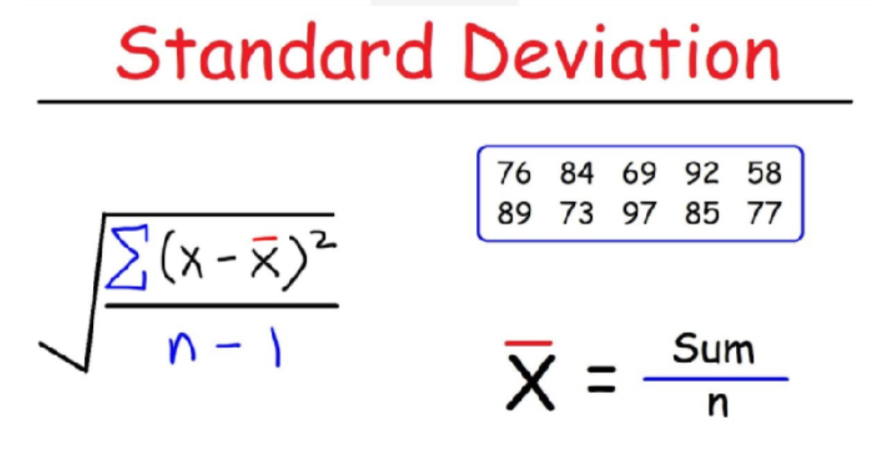

It is applied on data which have such distribution  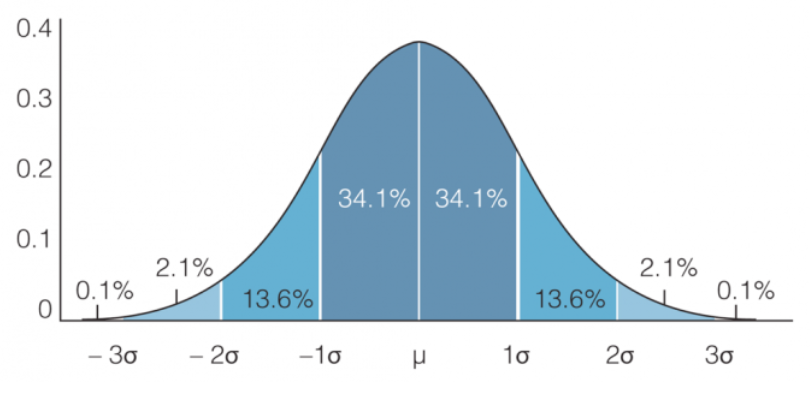

> Indented block



During standard scaling, we shift the mean of the features to value 0 and have standard deviation as 1. When the standard scaler is applied, we get values in the range of -3 to 3


In [ ]:
import pandas
import numpy as np



X = df8.iloc[:, :].values

from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
X[:, 1:3] = norm.fit_transform(X[:, 1:3])
print(X)


[['22' -1.8792829142594107]
 ['23' -0.40607620760379237]
 ['25' 0.8971451098223314]
 ['27' 0.8404833134124998]
 ['45' -0.2927526147841296]
 ['34' 0.8404833134124998]]


These keywords are often used inter-changeably. <br>While Normalization is to scale values between 0 and 1, <br>Standardization is about having Mean as 0 and Standard Deviation as 1. <br>There are some points to be considered while deciding whether we need Standardization or Normalization<br>
Standardization can be used in case when data represent Gaussian Curve<br>
Standardization is less impacted by outlier values.<br>
Impact of Outliers is very high in Normalization<br>(outliers means which lie outside of your prediction)<br>
Normalization is great when Non Gaussian Curve Representation (Gaussian curve is the belly like curve shown above)
